In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mt
import seaborn as sns

In [2]:
test=pd.read_csv(r'C:/Users/badhe/Downloads/test.csv')
train=pd.read_csv(r'C:/Users/badhe/Downloads/train.csv')
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
Drop=['Ticket','Cabin']

In [4]:
data = [train, test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train= train.drop(['Name'], axis=1)
test= test.drop(['Name'], axis=1)

In [5]:
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2


In [6]:
data = [train, test]
tit={'male':0,'female':1}
for i in data:
    i['Sex']=i['Sex'].map(tit)

In [7]:
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2


In [8]:
test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,0.363636,30.272590,0.447368,0.392344,35.627188,1.741627
std,120.810458,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576,1.006091
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,996.250000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,1.000000
50%,1100.500000,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200,1.000000
75%,1204.750000,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000,2.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,5.000000


In [9]:
train['Age']=train['Age'].fillna(29.69)

In [10]:
test['Age']=test['Age'].fillna(30.27)

In [11]:
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2


In [12]:
data=[train,test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [13]:
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,2,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,1,5,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,1,3,0,0,STON/O2. 3101282,7.9250,NaN,S,2


In [14]:
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,2,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,1,5,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,1,3,0,0,STON/O2. 3101282,7.9250,NaN,S,2


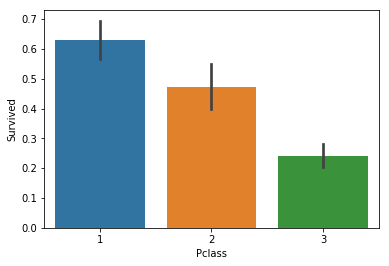

In [15]:
sns.barplot(x='Pclass', y='Survived', data=train)

In [16]:
data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
relatives      891 non-null int64
not_alone      891 non-null int32
dtypes: float64(1), int32(2), int64(8), object(3)
memory usage: 90.6+ KB


In [18]:
test['Fare']=test['Fare'].fillna(35.6)

In [19]:
data = [train, test]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare']=dataset['Fare'].astype(int)

In [20]:
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,relatives,not_alone
0,1,0,3,0,2,1,0,A/5 21171,0,NaN,S,1,1,0
1,2,1,1,1,5,1,0,PC 17599,3,C85,C,3,1,0
2,3,1,3,1,3,0,0,STON/O2. 3101282,1,NaN,S,2,0,1


In [21]:
train=train.drop(['Ticket','Cabin'],axis=1)
test=test.drop(['Ticket','Cabin'],axis=1)

In [22]:
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,relatives,not_alone
0,1,0,3,0,2,1,0,0,S,1,1,0
1,2,1,1,1,5,1,0,3,C,3,1,0
2,3,1,3,1,3,0,0,1,S,2,0,1


In [23]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
data=[train,test]
for dataset in data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')

In [25]:
data=[train,test]
titt={'S':0,'C':1,'Q':2}
for dataset in data:
    dataset['Embarked']=dataset['Embarked'].map(titt)
    dataset['Embarked']=dataset['Embarked'].astype(int)

In [26]:
data=[train,test]
for dataset in data:
    dataset['AgeC']=dataset['Age']*dataset['Pclass']

In [27]:
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,relatives,not_alone,AgeC
0,1,0,3,0,2,1,0,0,0,1,1,0,6
1,2,1,1,1,5,1,0,3,1,3,1,0,5
2,3,1,3,1,3,0,0,1,0,2,0,1,9


In [28]:
data=[train,test]
for dataset in data:
    dataset['FareRel']=dataset['Fare']/(dataset['relatives']+1)
    dataset['FareRel'] = dataset['FareRel'].astype(int)

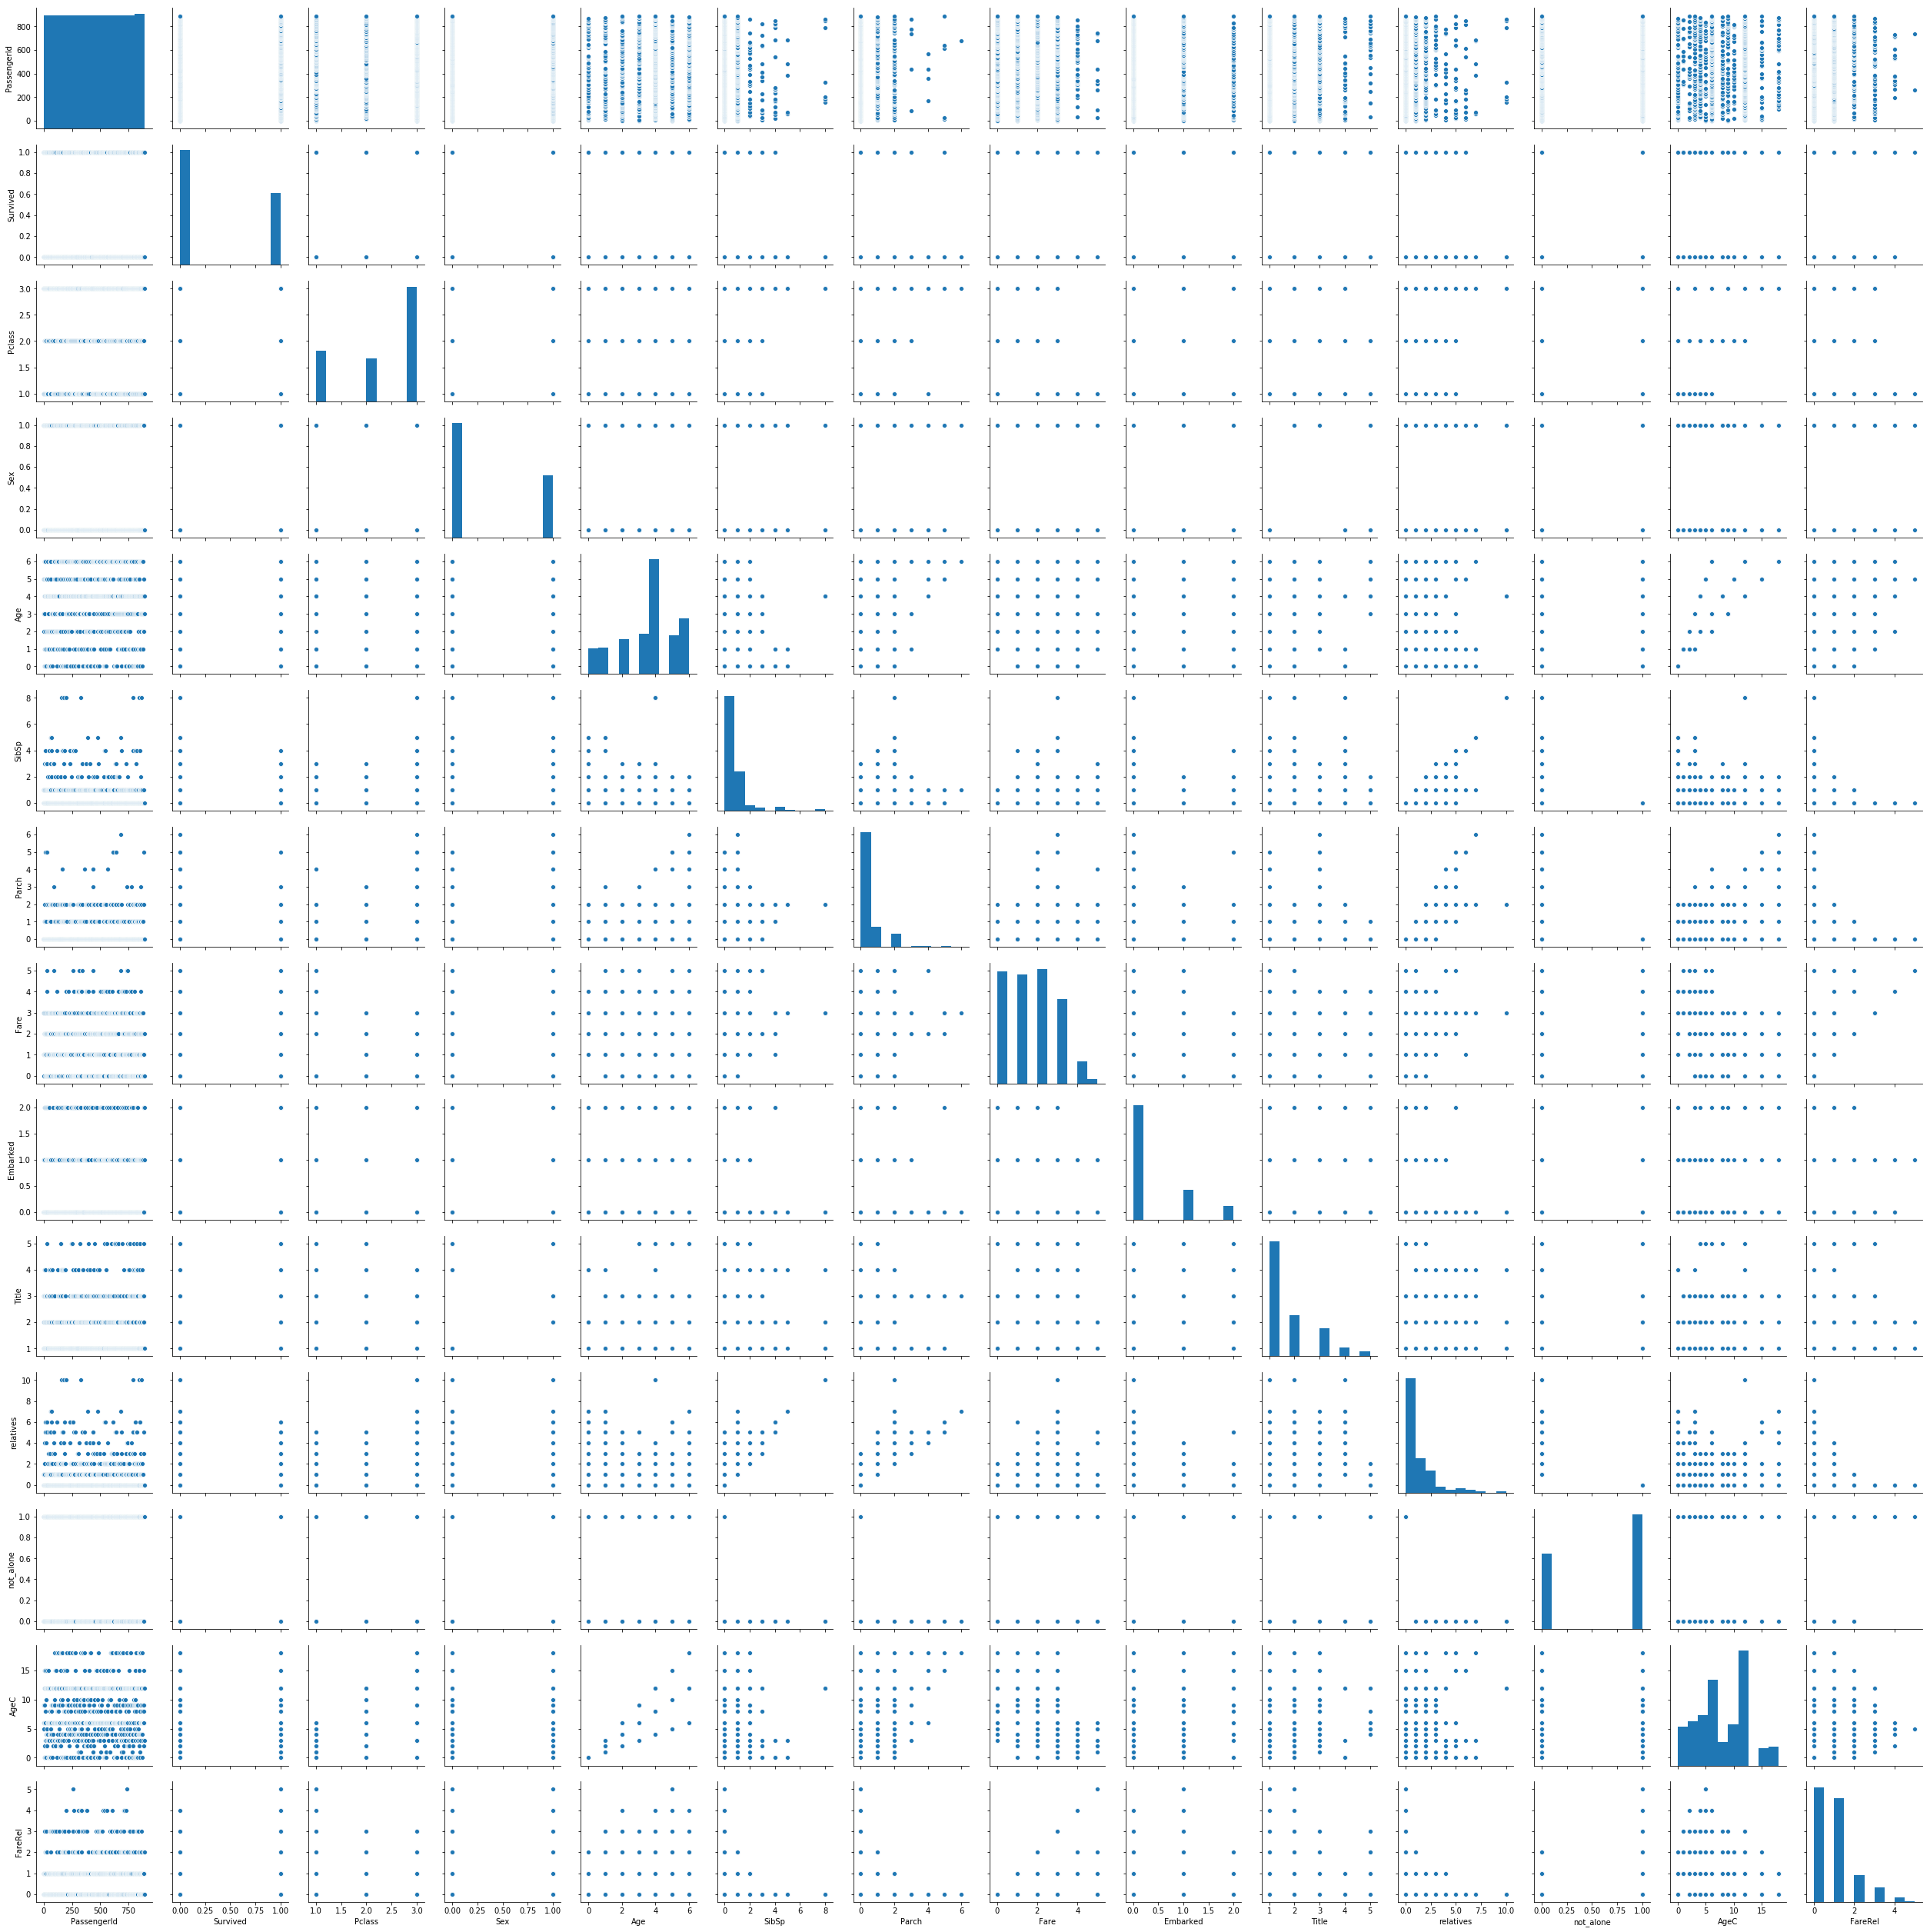

In [29]:
sns.pairplot(train)

In [30]:
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,relatives,not_alone,AgeC,FareRel
0,1,0,3,0,2,1,0,0,0,1,1,0,6,0
1,2,1,1,1,5,1,0,3,1,3,1,0,5,1
2,3,1,3,1,3,0,0,1,0,2,0,1,9,1


In [31]:
train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,relatives,not_alone,AgeC,FareRel
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.029692,-0.057527,-0.001652,-0.020466,-0.030467,0.003878,-0.040143,0.057462,0.007174,0.012164
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.064091,-0.035322,0.081629,0.307547,0.106811,0.407753,0.016639,-0.203367,-0.287449,0.181321
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.293455,0.083081,0.018443,-0.653366,0.045702,-0.173929,0.065997,0.135207,0.454106,-0.617958
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.085103,0.114631,0.245489,0.256491,0.116569,0.502713,0.200988,-0.303646,-0.160924,0.024410
Age,0.029692,-0.064091,-0.293455,-0.085103,1.000000,-0.238989,-0.200712,0.043349,0.023064,-0.116390,-0.263613,0.191849,0.669185,0.272337
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.238989,1.000000,0.414838,0.368409,-0.059961,0.269623,0.890712,-0.584471,-0.192893,-0.250564
Parch,-0.001652,0.081629,0.018443,0.245489,-0.200712,0.414838,1.000000,0.396754,-0.078665,0.315784,0.783111,-0.583398,-0.147419,-0.281456
Fare,-0.020466,0.307547,-0.653366,0.256491,0.043349,0.368409,0.396754,1.000000,-0.065490,0.321400,0.450006,-0.547811,-0.434698,0.565822
Embarked,-0.030467,0.106811,0.045702,0.116569,0.023064,-0.059961,-0.078665,-0.065490,1.000000,0.045400,-0.080281,0.017807,0.053695,-0.040557
Title,0.003878,0.407753,-0.173929,0.502713,-0.116390,0.269623,0.315784,0.321400,0.045400,1.000000,0.342039,-0.405813,-0.253887,-0.023822


In [32]:
features = ['Pclass','Sex','Age','SibSp','Fare','Embarked','Title','relatives','AgeC','FareRel']
target = 'Survived'

In [33]:
X_train=train[features]
Y_train=train[target]
X_test=test.drop(['PassengerId','not_alone','Parch'],axis=1)

In [34]:
X_train.shape

(891, 10)

In [35]:
Y_train.shape

(891,)

In [36]:
X_test.shape

(418, 10)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [38]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.75555556 0.81111111 0.76404494 0.84269663 0.87640449 0.86516854
 0.84269663 0.80898876 0.85393258 0.85227273]
Mean: 0.8272871978209058
Standard Deviation: 0.03924050071218484


In [40]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 83.28 %
